# Python3 Notebook for Capstone Project Created As Part of The PGPML Program Offered By Great Learning

**Group Members:**
1. Rajeswari
2. Diya
3. Deepak G Kumar
4. Dr. Shrishail S. Gajbhar

**Data Description:** The dataset is related to the housing industry. 

Analysis Base Table Name: innercity.csv

Domain: Housing industry

Problem Statement :Housing Price Prediction based on certain characteristics of the house

For many people, buying a property is one of the most important decision and purchase in life. Besides the affordability of a house, other factors such as the desirability of the location and the long-term investment prospects also affect the decision-making process. Every house also has its own unique characteristics, such as a particular view or type of sink, Number of bed rooms, furnished or unfurnished etc. It is clear that many variables/features affect the trend in housing prices, find a predictive model that encompasses the relationships between these variables and housing prices.



**Aim: To build regression model to predict the house selling price given its different features.**


## This notebook is divided into four sections
1. EDA
2. Preprocessing
3. Model Building
4. Model Performance Improvement

In [0]:
#importing all Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
import math
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder
import copy
from datetime import datetime as dt
import time

from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')
import sklearn.feature_selection
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from sklearn import preprocessing 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression # Linear Regression model
from sklearn.neighbors import KNeighborsRegressor # K-NN Regressor Model
from sklearn.tree import DecisionTreeRegressor # Decision tree regressor
# Let's import the ensemble regressor models
from sklearn.ensemble import AdaBoostRegressor,RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor
from sklearn.pipeline import Pipeline # Import sklearn pipeline
from sklearn.model_selection import cross_val_score, KFold # Cross validation
from sklearn.metrics import explained_variance_score # Metric used to evaluate the regression models
from sklearn.preprocessing import StandardScaler, MaxAbsScaler, MinMaxScaler, RobustScaler 
import warnings # Import warnings module
warnings.filterwarnings('ignore') # Ignore the warnings
from sklearn.model_selection import RandomizedSearchCV # For finding the best hyperparamters
import pickle
from scipy.stats import zscore # zscore normalization from scipy.stats
from sklearn.utils import resample # Used to find the bootstrapping confidence interval



# 1. EDA

In [0]:
#Loading the dataset

housedata_df= pd.read_csv("innercity.csv")

In [0]:
#Total no of rows and columns in the dataset

housedata_df.shape

(21613, 23)

The dataset containes :21613 rows and 23 columns 

In [0]:
#finding total no of different datatypes in the data set

housedata_df.dtypes.value_counts()

int64      18
float64     4
object      1
dtype: int64

 Dataypes in the dataset :
18 columns as integer dataype 
4  columns as float dataype
1  columns as object/ string dataype


In [0]:
#Total no of rows and datatype of each columns/fields

housedata_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 23 columns):
cid                 21613 non-null int64
dayhours            21613 non-null object
price               21613 non-null int64
room_bed            21613 non-null int64
room_bath           21613 non-null float64
living_measure      21613 non-null int64
lot_measure         21613 non-null int64
ceil                21613 non-null float64
coast               21613 non-null int64
sight               21613 non-null int64
condition           21613 non-null int64
quality             21613 non-null int64
ceil_measure        21613 non-null int64
basement            21613 non-null int64
yr_built            21613 non-null int64
yr_renovated        21613 non-null int64
zipcode             21613 non-null int64
lat                 21613 non-null float64
long                21613 non-null float64
living_measure15    21613 non-null int64
lot_measure15       21613 non-null int64
furnished           2

Price is the target column and we have 22 independent features
Price is of integer datatype and has not null values

All the columns has 21613 row and not null values


In [0]:
# view the first fiverows of the dataset
housedata_df.head()

cid         dayhours   price  room_bed  room_bath  living_measure  \
0  3034200666  20141107T000000  808100         4       3.25            3020   
1  8731981640  20141204T000000  277500         4       2.50            2550   
2  5104530220  20150420T000000  404000         3       2.50            2370   
3  6145600285  20140529T000000  300000         2       1.00             820   
4  8924100111  20150424T000000  699000         2       1.50            1400   

   lot_measure  ceil  coast  sight  ...  basement  yr_built  yr_renovated  \
0        13457   1.0      0      0  ...         0      1956             0   
1         7500   1.0      0      0  ...       800      1976             0   
2         4324   2.0      0      0  ...         0      2006             0   
3         3844   1.0      0      0  ...         0      1916             0   
4         4050   1.0      0      0  ...         0      1954             0   

   zipcode      lat     long  living_measure15  lot_measure15  furnished  \
0    98133  47.7174 -122.336              2120           7553          1   
1    98023  47.3165 -122.386              2260           8800          0   
2    98038  47.3515 -121.999              2370           4348          0   
3    98133  47.7049 -122.349              1520           3844          0   
4    98115  47.6768 -122.269              1900           5940          0   

   total_area  
0       16477  
1       10050  
2        6694  
3        4664  
4        5450  

[5 rows x 23 columns]

In [0]:
#Details of each columns :-min, max ,mean, std ,count ..

housedata_df.describe().transpose()

count          mean           std           min  \
cid               21613.0  4.580302e+09  2.876566e+09  1.000102e+06   
price             21613.0  5.401822e+05  3.673622e+05  7.500000e+04   
room_bed          21613.0  3.370842e+00  9.300618e-01  0.000000e+00   
room_bath         21613.0  2.114757e+00  7.701632e-01  0.000000e+00   
living_measure    21613.0  2.079900e+03  9.184409e+02  2.900000e+02   
lot_measure       21613.0  1.510697e+04  4.142051e+04  5.200000e+02   
ceil              21613.0  1.494309e+00  5.399889e-01  1.000000e+00   
coast             21613.0  7.541757e-03  8.651720e-02  0.000000e+00   
sight             21613.0  2.343034e-01  7.663176e-01  0.000000e+00   
condition         21613.0  3.409430e+00  6.507430e-01  1.000000e+00   
quality           21613.0  7.656873e+00  1.175459e+00  1.000000e+00   
ceil_measure      21613.0  1.788391e+03  8.280910e+02  2.900000e+02   
basement          21613.0  2.915090e+02  4.425750e+02  0.000000e+00   
yr_built          21613.0  1.971005e+03  2.937341e+01  1.900000e+03   
yr_renovated      21613.0  8.440226e+01  4.016792e+02  0.000000e+00   
zipcode           21613.0  9.807794e+04  5.350503e+01  9.800100e+04   
lat               21613.0  4.756005e+01  1.385637e-01  4.715590e+01   
long              21613.0 -1.222139e+02  1.408283e-01 -1.225190e+02   
living_measure15  21613.0  1.986552e+03  6.853913e+02  3.990000e+02   
lot_measure15     21613.0  1.276846e+04  2.730418e+04  6.510000e+02   
furnished         21613.0  1.966872e-01  3.975030e-01  0.000000e+00   
total_area        21613.0  1.718687e+04  4.158908e+04  1.423000e+03   

                           25%           50%           75%           max  
cid               2.123049e+09  3.904930e+09  7.308900e+09  9.900000e+09  
price             3.219500e+05  4.500000e+05  6.450000e+05  7.700000e+06  
room_bed          3.000000e+00  3.000000e+00  4.000000e+00  3.300000e+01  
room_bath         1.750000e+00  2.250000e+00  2.500000e+00  8.000000e+00  
living_measure    1.427000e+03  1.910000e+03  2.550000e+03  1.354000e+04  
lot_measure       5.040000e+03  7.618000e+03  1.068800e+04  1.651359e+06  
ceil              1.000000e+00  1.500000e+00  2.000000e+00  3.500000e+00  
coast             0.000000e+00  0.000000e+00  0.000000e+00  1.000000e+00  
sight             0.000000e+00  0.000000e+00  0.000000e+00  4.000000e+00  
condition         3.000000e+00  3.000000e+00  4.000000e+00  5.000000e+00  
quality           7.000000e+00  7.000000e+00  8.000000e+00  1.300000e+01  
ceil_measure      1.190000e+03  1.560000e+03  2.210000e+03  9.410000e+03  
basement          0.000000e+00  0.000000e+00  5.600000e+02  4.820000e+03  
yr_built          1.951000e+03  1.975000e+03  1.997000e+03  2.015000e+03  
yr_renovated      0.000000e+00  0.000000e+00  0.000000e+00  2.015000e+03  
zipcode           9.803300e+04  9.806500e+04  9.811800e+04  9.819900e+04  
lat               4.747100e+01  4.757180e+01  4.767800e+01  4.777760e+01  
long             -1.223280e+02 -1.222300e+02 -1.221250e+02 -1.213150e+02  
living_measure15  1.490000e+03  1.840000e+03  2.360000e+03  6.210000e+03  
lot_measure15     5.100000e+03  7.620000e+03  1.008300e+04  8.712000e+05  
furnished         0.000000e+00  0.000000e+00  0.000000e+00  1.000000e+00  
total_area        7.035000e+03  9.575000e+03  1.300000e+04  1.652659e+06

Max no of bathroom :8   min no of bathroom : 0
Max no of bedroom :3.3  min no of bedroom : 0
Max living measure : 1.354000e+04 min living measure : 2.900000e+02
Mean Price :  5.401822e+05 50% of the houses sold at the price of  4.500000e+05 and the maximun house price is 7.7000000     

In [0]:
#Describing the dayhours objecttype column
housedata_df['dayhours'].describe()

count               21613
unique                372
top       20140623T000000
freq                  142
Name: dayhours, dtype: object

There are total of 372 unique date entry 
frequency of the occurance of the same date is 142

Visualizing the data in the dataset

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000C741388>,
      dtype=object)

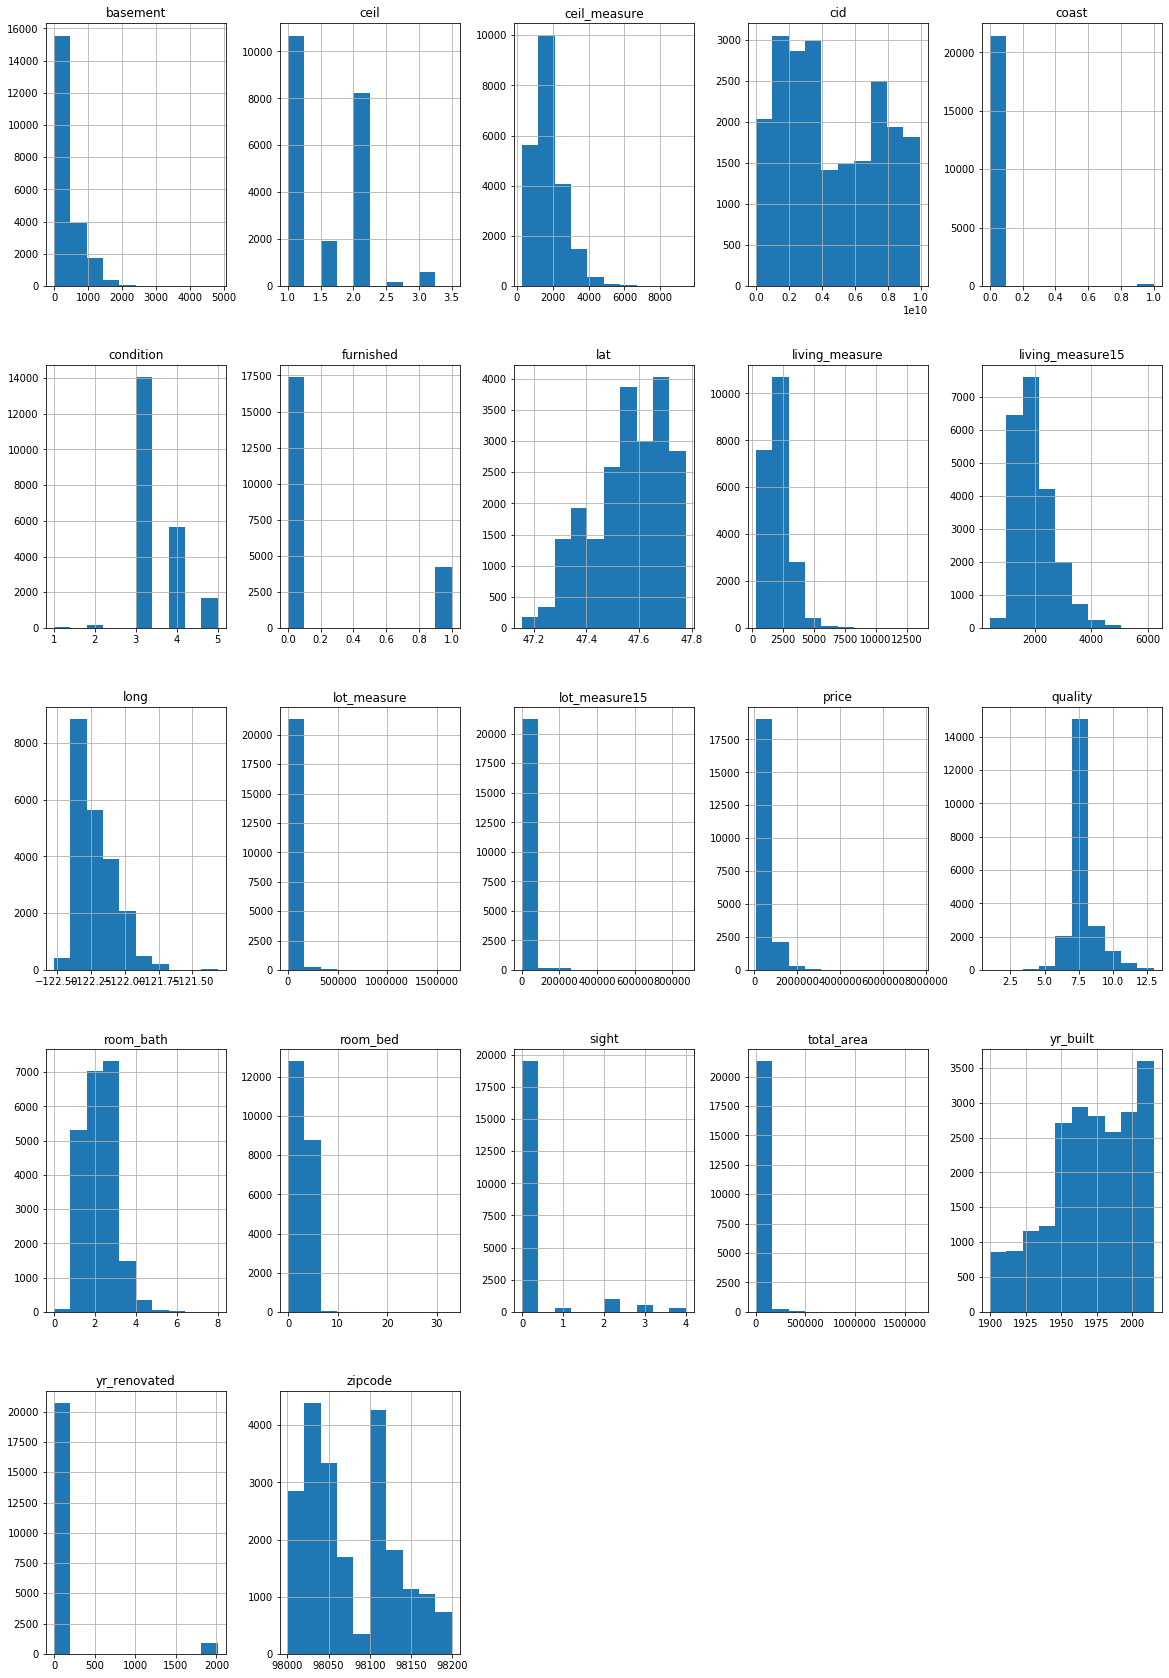

In [0]:
housedata_df.hist(figsize=(20,30))

-Very few houses  are renovated .Only 914 houses are renovated out of total 21613 records
-house with no sight or 0 record is more after that we have house few more houses with 2 sights hose with 1 or 4 site is very minimal
-most of the houses in the dataset has bedroom within the range of 0 to 5
-more no of houses  are built from year 2000 onwards .from the year 1900 to 1950 we can see less no of house got constructed 
more no of unfurnished house are there in data set .17500 houser are unfurnished and near about only 4000 houses are furnished 
Most of the housesa are non coast in the dataset.and very few houses negligible amount of houses are near the coast

 

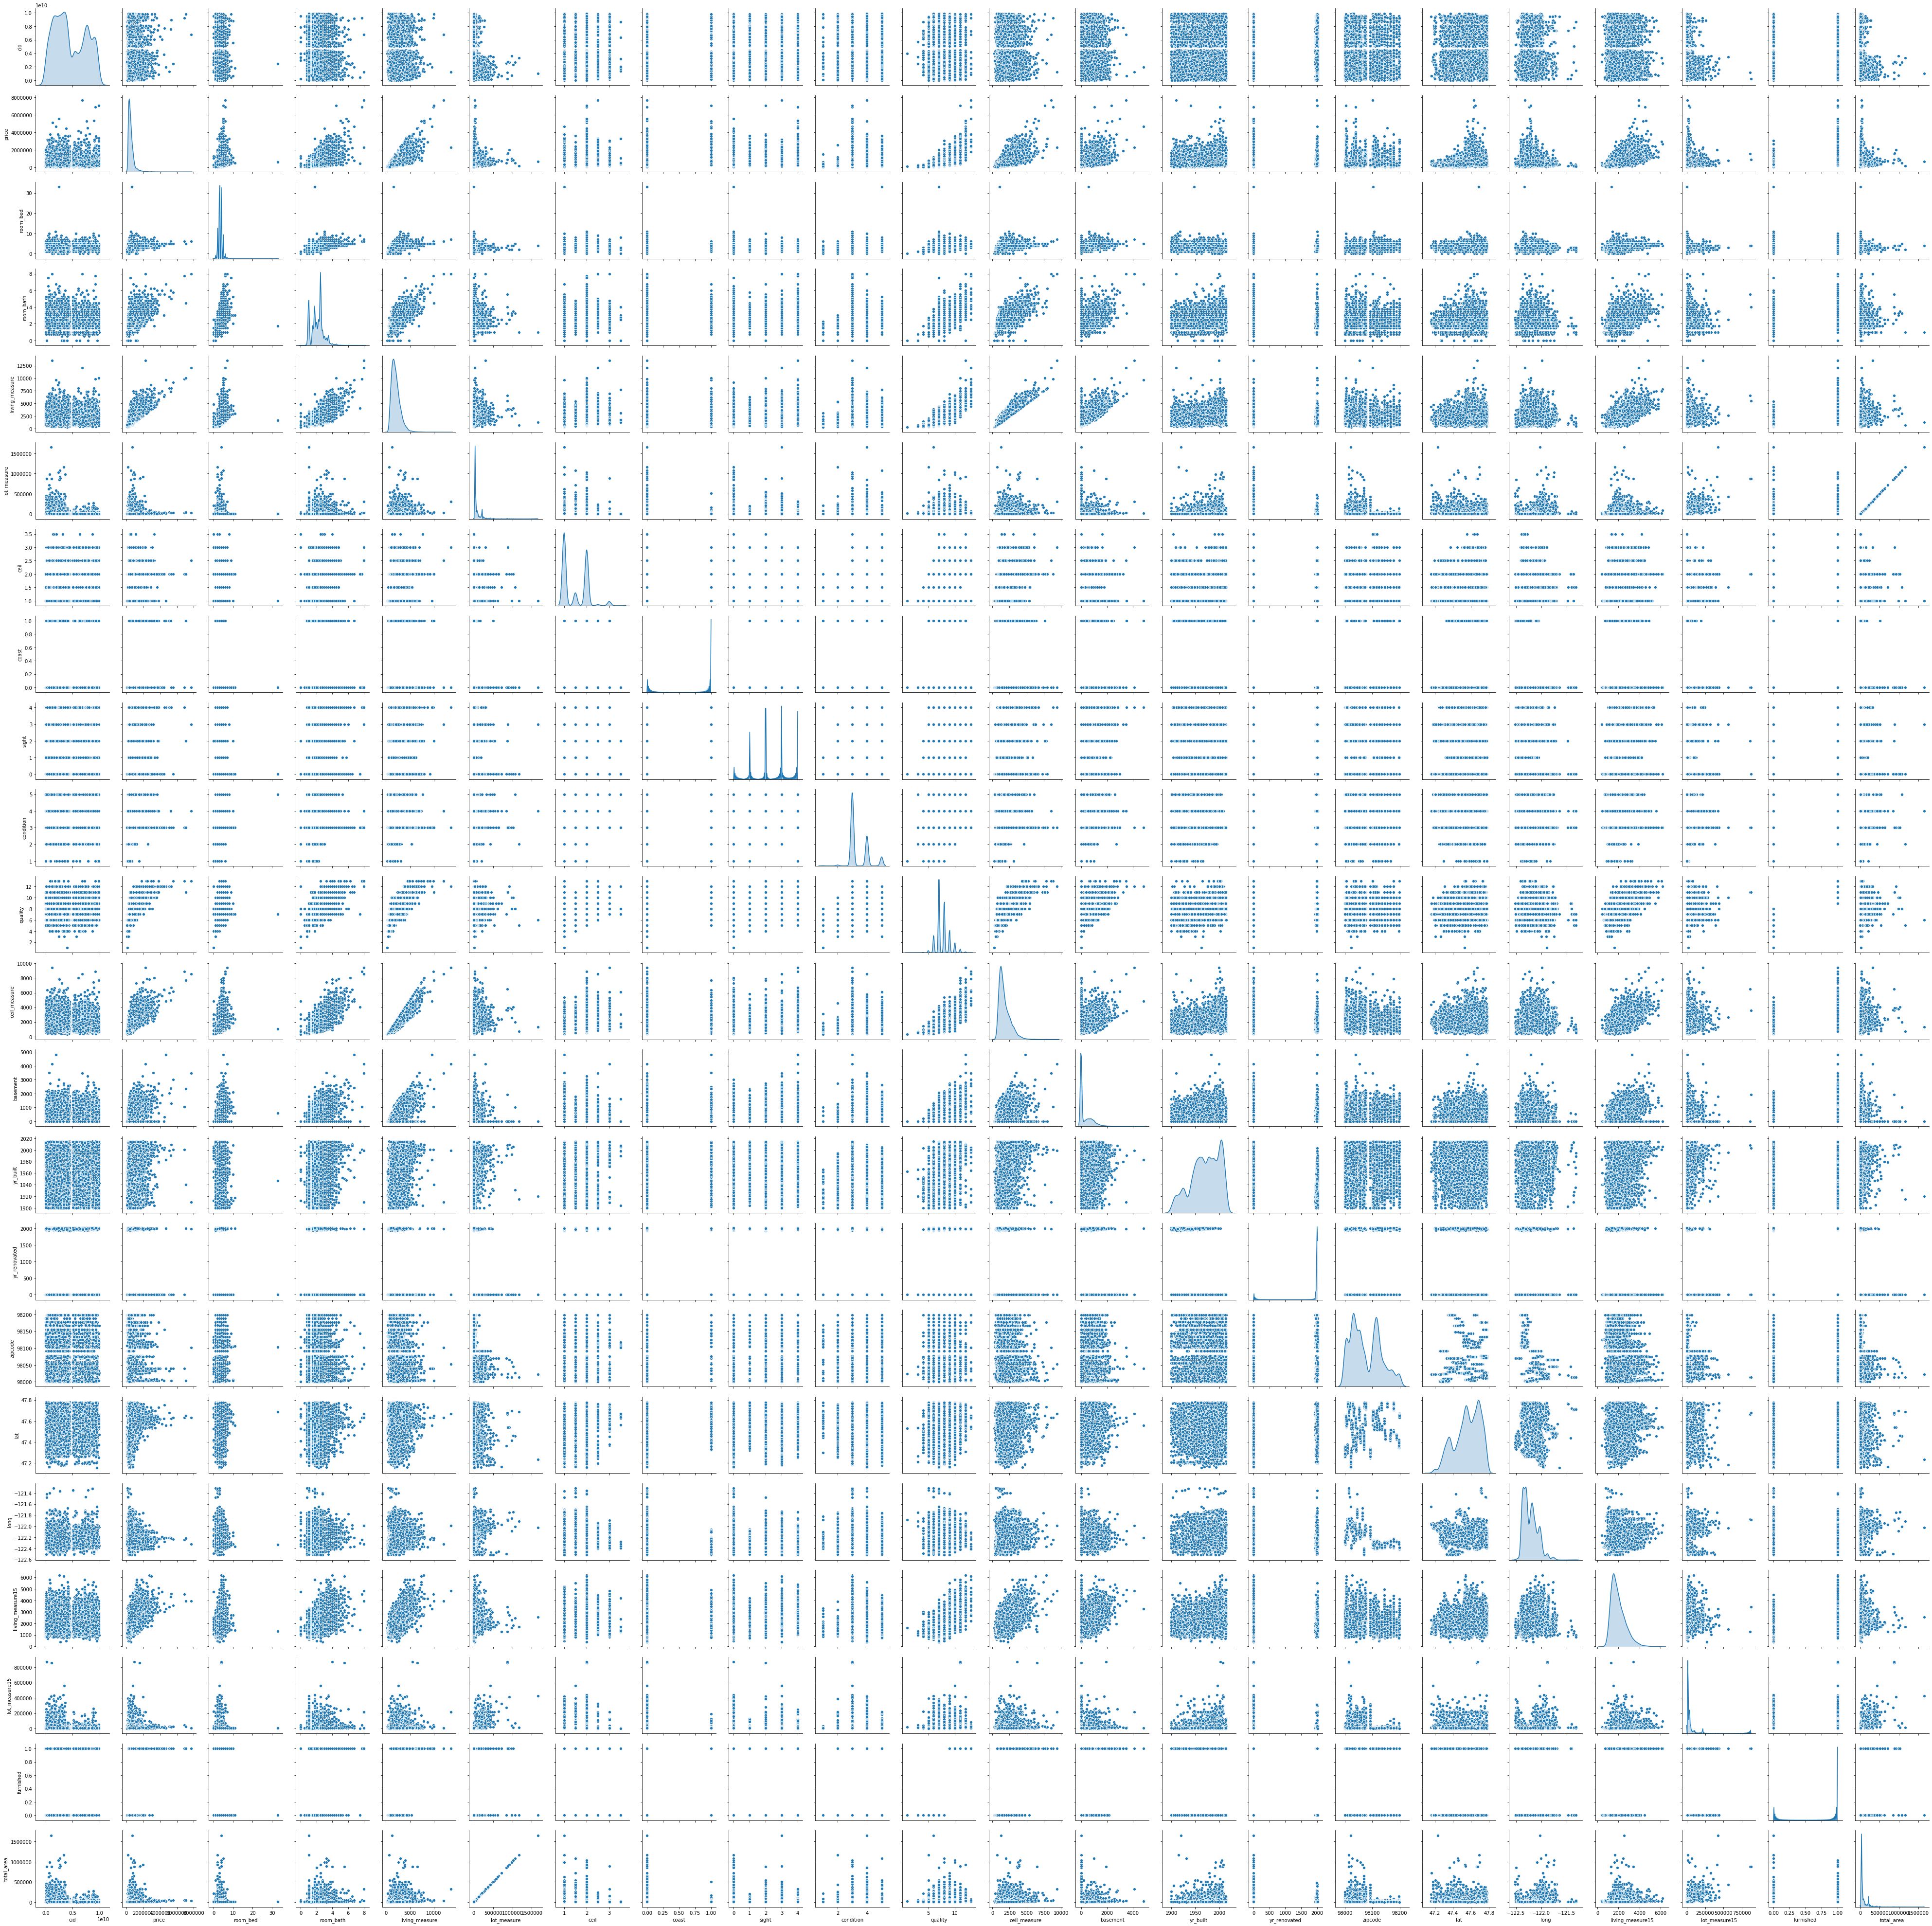

In [0]:
sns.pairplot(data=housedata_df ,diag_kind='kde')

   There is Linear relation exist between lot_ measure and total area
   And also there is some linear relation between ceil_measure and living_measure

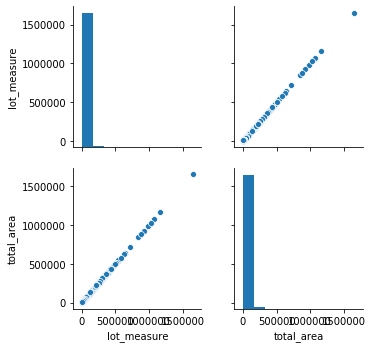

In [0]:
#visualizing the linear relation between Lot measure  and total area 

sns.pairplot(housedata_df, vars=["lot_measure", "total_area"])

we can clearly see that there is a linear relation between total_area and lot_measure 

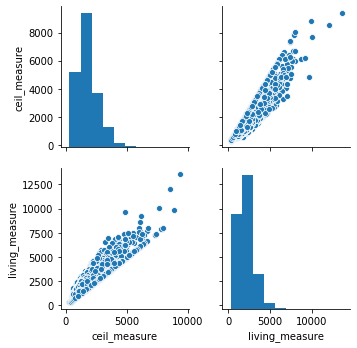

In [0]:
#visualizing the linear relation between ceil_measure  and living_measure

sns.pairplot(housedata_df, vars=["ceil_measure", "living_measure"])

As we can clearly see ceil_measure is having linear relation with the living_meaure and there are few outliers as well

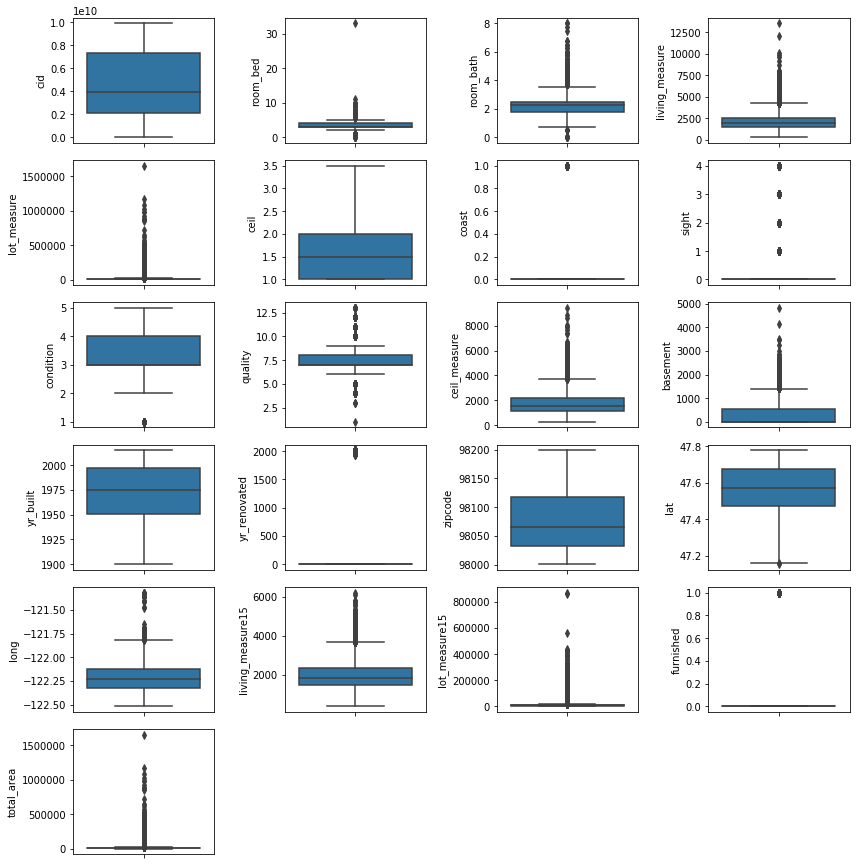

In [0]:
#housedata_df.plot(kind='box',figsize=(10,8))

#numerical_features = housedata_df.select_dtypes(exclude=['datetime64[ns]']).drop(['price'], axis=1).copy()
numerical_features = housedata_df.drop(['price','dayhours'], axis=1).copy()
fig = plt.figure(figsize=(12,18))
for i in range(len(numerical_features.columns)):
    fig.add_subplot(9,4,i+1)
    sns.boxplot(y=numerical_features.iloc[:,i])

plt.tight_layout()
plt.show()

From the box plot we can say that we have a more no of outliers in the data set 
Total_area ,long,living_measures15 lot_measure15,basement ceil_measure,quality,
lot_measure,living meausre ,room bath and room bath are having more no of outliers 

Furnished  and coast columns are having either 0 ot 1 value 

No outliers in cid ,ceil,yr_built,conditions and Zipcode columns

In [0]:
#correlation Matrix of numerical columns

hprice_cr=housedata_df.corr()
hprice_cr

cid     price  room_bed  room_bath  living_measure  \
cid               1.000000 -0.016797  0.001286   0.005160       -0.012258   
price            -0.016797  1.000000  0.308338   0.525134        0.702044   
room_bed          0.001286  0.308338  1.000000   0.515884        0.576671   
room_bath         0.005160  0.525134  0.515884   1.000000        0.754665   
living_measure   -0.012258  0.702044  0.576671   0.754665        1.000000   
lot_measure      -0.132109  0.089655  0.031703   0.087740        0.172826   
ceil              0.018525  0.256786  0.175429   0.500653        0.353949   
coast            -0.002721  0.266331 -0.006582   0.063744        0.103818   
sight             0.011592  0.397346  0.079532   0.187737        0.284611   
condition        -0.023783  0.036392  0.028472  -0.124982       -0.058753   
quality           0.008130  0.667463  0.356967   0.664983        0.762704   
ceil_measure     -0.010842  0.605566  0.477600   0.685342        0.876597   
basement         -0.005151  0.323837  0.303093   0.283770        0.435043   
yr_built          0.021380  0.053982  0.154178   0.506019        0.318049   
yr_renovated     -0.016907  0.126442  0.018841   0.050739        0.055363   
zipcode          -0.008224 -0.053168 -0.152668  -0.203866       -0.199430   
lat              -0.001891  0.306919 -0.008931   0.024573        0.052529   
long              0.020799  0.021571  0.129473   0.223042        0.240223   
living_measure15 -0.002901  0.585374  0.391638   0.568634        0.756420   
lot_measure15    -0.138798  0.082456  0.029244   0.087175        0.183286   
furnished        -0.010009  0.565991  0.259268   0.484923        0.632947   
total_area       -0.131844  0.104796  0.044310   0.104050        0.194209   

                  lot_measure      ceil     coast     sight  condition  ...  \
cid                 -0.132109  0.018525 -0.002721  0.011592  -0.023783  ...   
price                0.089655  0.256786  0.266331  0.397346   0.036392  ...   
room_bed             0.031703  0.175429 -0.006582  0.079532   0.028472  ...   
room_bath            0.087740  0.500653  0.063744  0.187737  -0.124982  ...   
living_measure       0.172826  0.353949  0.103818  0.284611  -0.058753  ...   
lot_measure          1.000000 -0.005201  0.021604  0.074710  -0.008958  ...   
ceil                -0.005201  1.000000  0.023698  0.029444  -0.263768  ...   
coast                0.021604  0.023698  1.000000  0.401857   0.016653  ...   
sight                0.074710  0.029444  0.401857  1.000000   0.045990  ...   
condition           -0.008958 -0.263768  0.016653  0.045990   1.000000  ...   
quality              0.113621  0.458183  0.082775  0.251321  -0.144674  ...   
ceil_measure         0.183512  0.523885  0.072075  0.167649  -0.158214  ...   
basement             0.015286 -0.245705  0.080588  0.276947   0.174105  ...   
yr_built             0.053080  0.489319 -0.026161 -0.053440  -0.361417  ...   
yr_renovated         0.007644  0.006338  0.092885  0.103917  -0.060618  ...   
zipcode             -0.129574 -0.059121  0.030285  0.084827   0.003026  ...   
lat                 -0.085683  0.049614 -0.014274  0.006157  -0.014941  ...   
long                 0.229521  0.125419 -0.041910 -0.078400  -0.106500  ...   
living_measure15     0.144608  0.279885  0.086463  0.280439  -0.092824  ...   
lot_measure15        0.718557 -0.011269  0.030703  0.072575  -0.003406  ...   
furnished            0.118883  0.347749  0.069882  0.220250  -0.121902  ...   
total_area           0.999763  0.002637  0.023809  0.080693  -0.010219  ...   

                  basement  yr_built  yr_renovated   zipcode       lat  \
cid              -0.005151  0.021380     -0.016907 -0.008224 -0.001891   
price             0.323837  0.053982      0.126442 -0.053168  0.306919   
room_bed          0.303093  0.154178      0.018841 -0.152668 -0.008931   
room_bath         0.283770  0.506019      0.050739 -0.203866  0.024573   
living_measure    0.435043  0.318049      0.055363 -0.199430  0

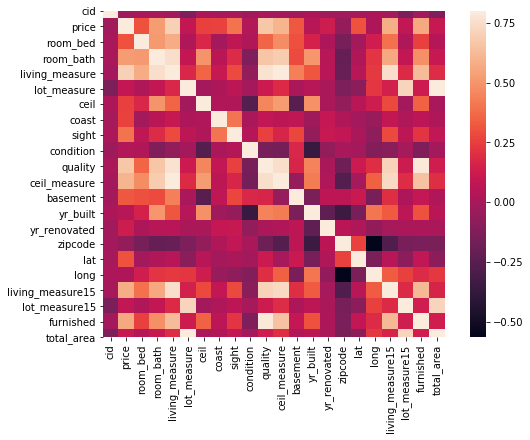

In [0]:
# Correlation Matrix Heatmap

f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(hprice_cr, vmax=.8, square=True);

In [0]:
# Top 10 Heatmap
k = 10 #number of variables for heatmap
cols = hprice_cr.nlargest(k, 'price')['price'].index
cm = np.corrcoef(housedata_df[cols].values.T)

most_corr = pd.DataFrame(cols)
most_corr.columns = ['Most Correlated Features']
most_corr

Most Correlated Features
0                    price
1           living_measure
2                  quality
3             ceil_measure
4         living_measure15
5                furnished
6                room_bath
7                    sight
8                 basement
9                 room_bed

In [0]:
#Important features related to the Target 
print("Find most important features relative to target")
corr = housedata_df.corr()
corr.sort_values(['price'], ascending=False, inplace=True)
corr.price

Find most important features relative to target


price               1.000000
living_measure      0.702044
quality             0.667463
ceil_measure        0.605566
living_measure15    0.585374
furnished           0.565991
room_bath           0.525134
sight               0.397346
basement            0.323837
room_bed            0.308338
lat                 0.306919
coast               0.266331
ceil                0.256786
yr_renovated        0.126442
total_area          0.104796
lot_measure         0.089655
lot_measure15       0.082456
yr_built            0.053982
condition           0.036392
long                0.021571
cid                -0.016797
zipcode            -0.053168
Name: price, dtype: float64

Living measure ,quantity  & ceil_meausres are the top most import features for identifing the price 

In [0]:
housedata_df['price'].value_counts().head(30)

450000    172
350000    172
550000    159
500000    152
425000    150
325000    148
400000    145
375000    138
300000    133
525000    131
250000    130
475000    120
330000    119
650000    117
275000    113
315000    111
415000    111
600000    110
390000    110
280000    110
440000    109
320000    108
435000    105
340000    103
310000    101
335000     98
420000     97
360000     96
260000     95
265000     95
Name: price, dtype: int64

 count of  the no of house having same price 

Text(0.5, 1.0, 'price Distribution Vs Number of houses')

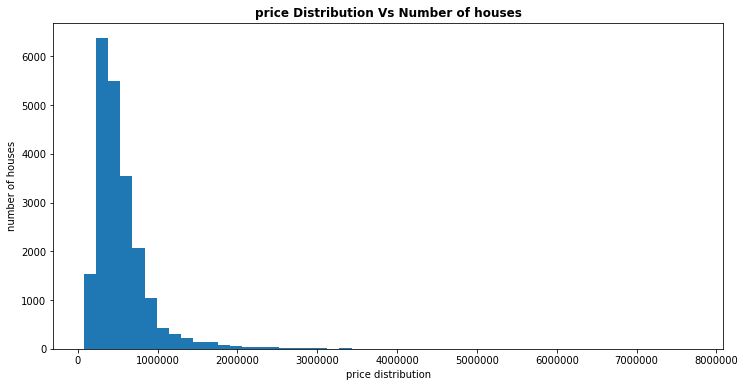

In [0]:
#View the price distribution based on the no of houses
plt.figure(figsize =(12,6))

plt.hist(housedata_df['price'],bins=50)
plt.xlabel("price distribution")
plt.ylabel("number of houses")
plt.title("price Distribution Vs Number of houses",weight="bold")

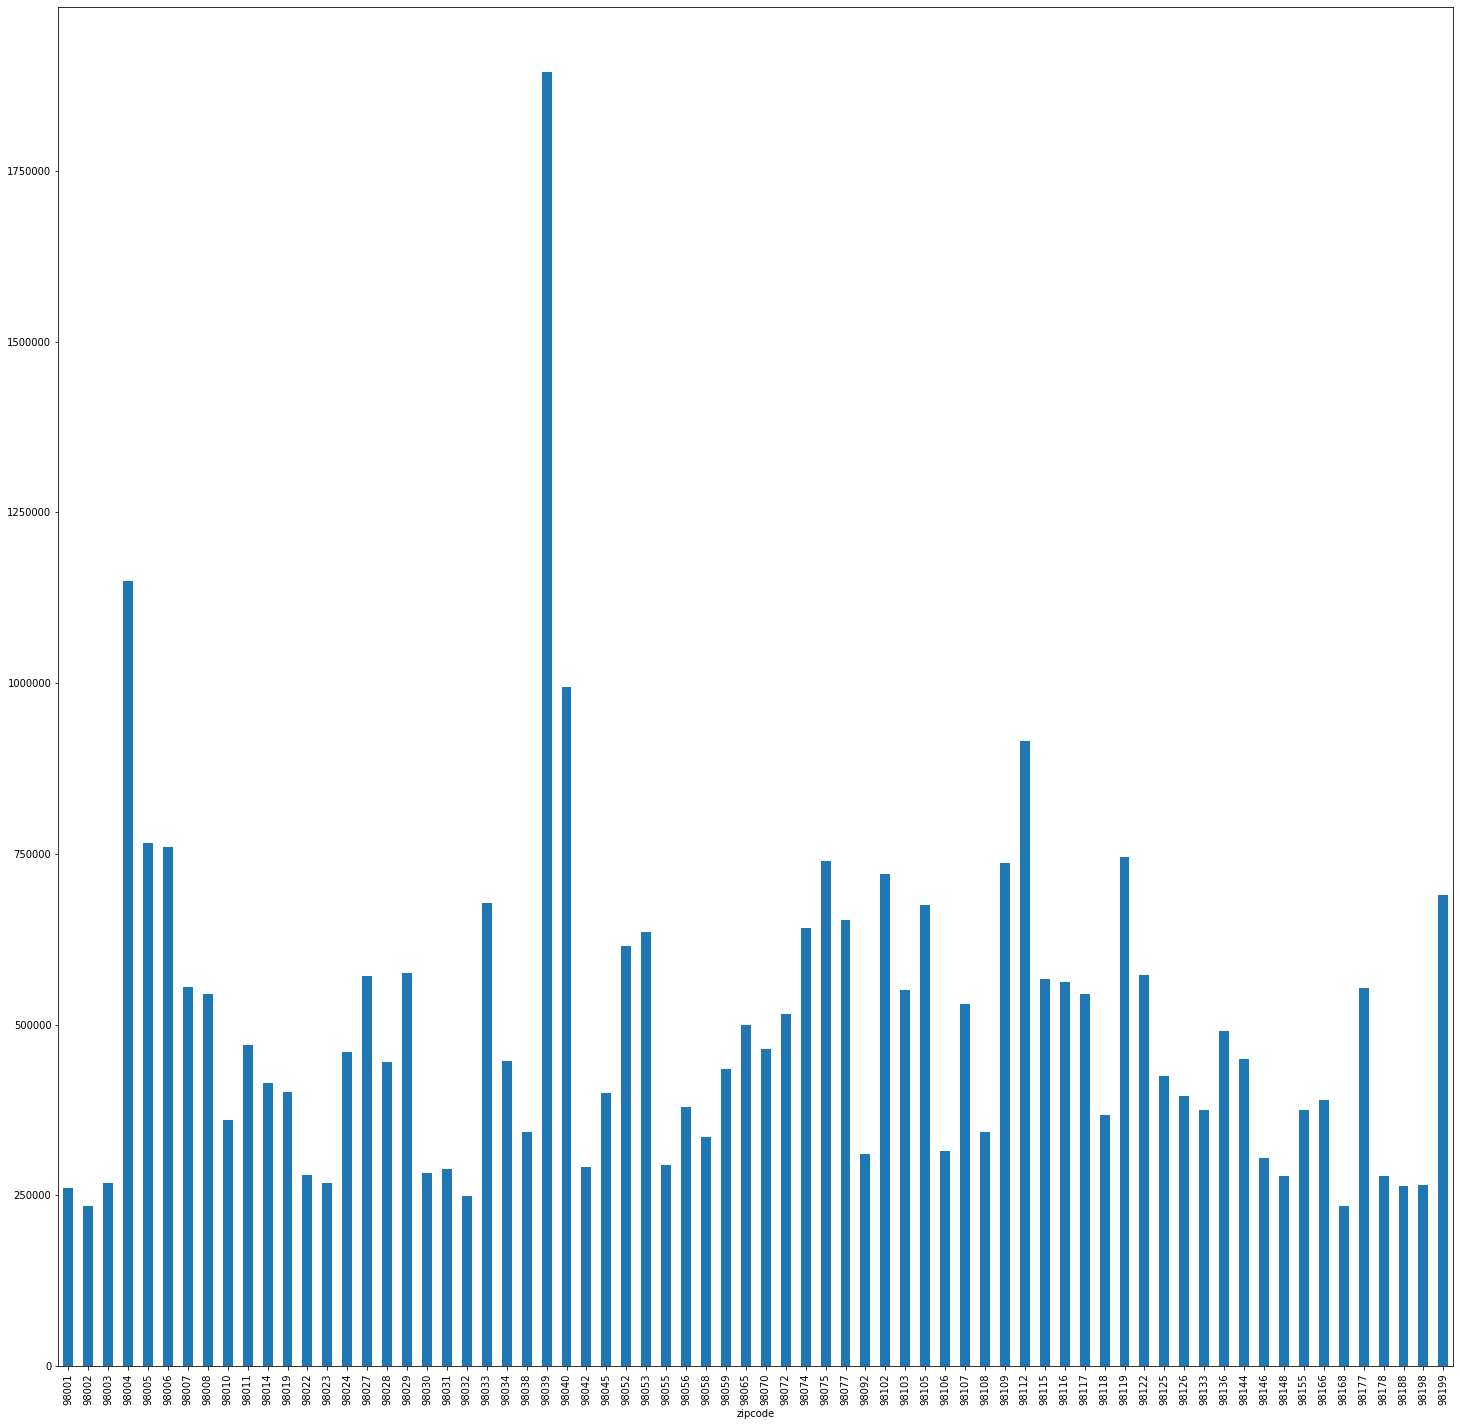

In [0]:
 #Zip Code and Price distribution
housedata_df.groupby('zipcode')['price'].median().plot(kind='bar',figsize=(25,25))

Zip code 98039 is having the highest house price 
and the houses falls under the zip code 98022 and 98032 having the loest price

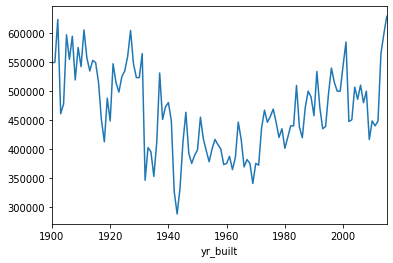

In [0]:
 #distribution of price based on the year_built and the price 
housedata_df.groupby('yr_built')['price'].median().plot()

Houses built during the year 1940 has the lowest price and 
the houses built from the year 2000  are having the highest house price 

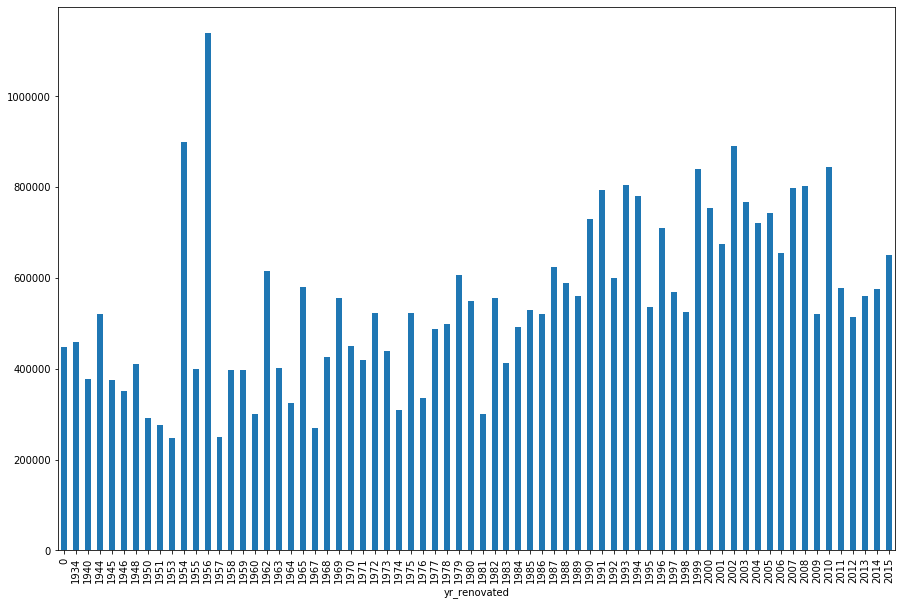

In [0]:
# distribution of price between the year house renovated and the price 
housedata_df.groupby('yr_renovated')['price'].median().plot(kind='bar',figsize=(15,10))

houses renovated in the year 1954 and 1955 are having more price 


In [0]:
# view the the price of the house based on the no of bedrooms
grpby_bedrooms_df = housedata_df[["price", "room_bed"]].groupby(by = "room_bed", as_index = False)
grpby_bedrooms_df = grpby_bedrooms_df.mean().astype(int)
grpby_bedrooms_df.head()


room_bed   price
0         0  410223
1         1  317657
2         2  401387
3         3  466276
4         4  635564

House with 4 bedroom is having more price 635564
and we can observed that 0 bedroom house is having price of 410223 which is more than single and double bedroom house .so we can clearly see some noise/discrepency  in the data .

In [0]:
BoundingBox = ((housedata_df.long.min(),   housedata_df.long.max(),      
         housedata_df.lat.min(), housedata_df.lat.max()))
print (BoundingBox)

(-122.51899999999999, -121.315, 47.1559, 47.7776)


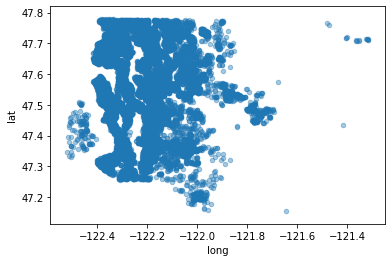

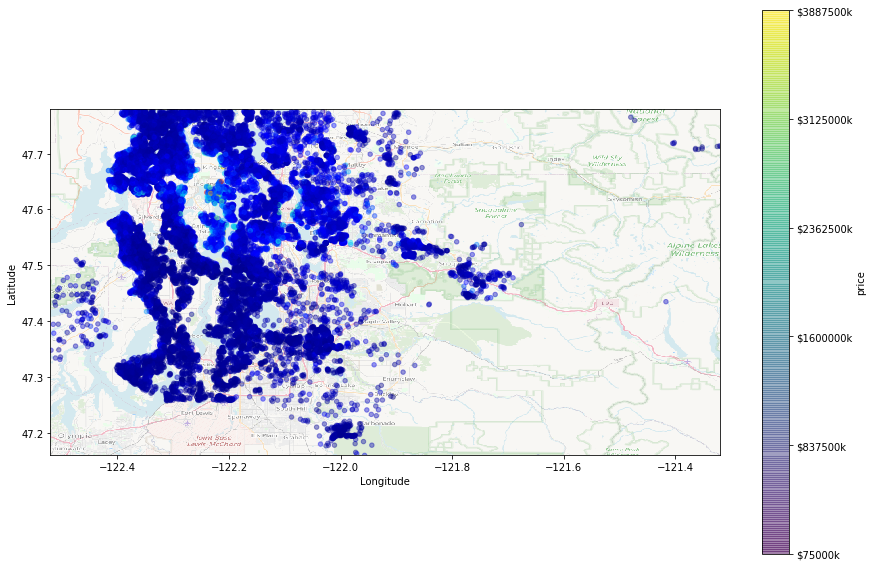

In [0]:
housedata_df.plot(kind="scatter", x="long", y="lat", alpha=0.4)
plt.show()
map_img=mpimg.imread('maphousing.png')
ax = housedata_df.plot(kind="scatter", x="long", y="lat", figsize=(15,10),
                       c="price", cmap=plt.get_cmap("jet"),
                       colorbar=False, alpha=0.4,
                      )
plt.imshow(map_img, extent=[-122.52, -121.32, 47.16, 47.78], alpha=0.5)
plt.ylabel("Latitude", fontsize=10)
plt.xlabel("Longitude", fontsize=10)

prices = housedata_df["price"]
tick_values = np.linspace(prices.min(), prices.max(), 11)
cbar = plt.colorbar ()
cbar.ax.set_yticklabels(["$%dk"%(round(v)) for v in tick_values], fontsize=10)
cbar.set_label('price', fontsize=10)

plt.show()

We can find that the highest price is around the location of longitude -122.2 and -122.3 and latitude 47.5 and 47.6
This is location has high number of houses. 

The lowest price is around the region longitude -121.906 and latitude 47.26. 
If we see the map closely, we will find that the are has few houses and more forest. 
We can also say that due to forest are and less residence, the prie of the property is low. 

# 2. Preprocessing



In [0]:
#2.1.Basic data cleaning 

In [0]:
# rearranging the columns to put the target column at begning,To make slicing easy between target and feature columns
 
housedata_df=housedata_df[['price','cid', 'dayhours','room_bed', 'room_bath', 'living_measure',
       'lot_measure', 'ceil', 'coast', 'sight', 'condition', 'quality',
       'ceil_measure', 'basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'living_measure15', 'lot_measure15', 'furnished',
       'total_area']]

In [0]:
#view the dataset  after rearranging the columns 
housedata_df.head(2)

price         cid         dayhours  room_bed  room_bath  living_measure  \
0  808100  3034200666  20141107T000000         4       3.25            3020   
1  277500  8731981640  20141204T000000         4       2.50            2550   

   lot_measure  ceil  coast  sight  ...  basement  yr_built  yr_renovated  \
0        13457   1.0      0      0  ...         0      1956             0   
1         7500   1.0      0      0  ...       800      1976             0   

   zipcode      lat     long  living_measure15  lot_measure15  furnished  \
0    98133  47.7174 -122.336              2120           7553          1   
1    98023  47.3165 -122.386              2260           8800          0   

   total_area  
0       16477  
1       10050  

[2 rows x 23 columns]

In [0]:
#2.1.1checking the Duplicate record in the dataset

housedata_df.duplicated().sum()


0

No Duplicate record in the dataset

In [0]:
#2.1.2 Dealing with the data type


#Converted object type to Datetime type
housedata_df['dayhours'] = pd.to_datetime(housedata_df['dayhours'])


#retriving the year from dayhours columns and created new year_house_sold 
housedata_df['year_house_sold'] = housedata_df['dayhours'].dt.year


Converted object type column to datetype and extracted the year and inserted the year into new feature year_house_sold 

In [0]:
#Determining the age of the house using the year_house_sold and yr_built column

housedata_df['house_age'] = (housedata_df['year_house_sold'])-(housedata_df['yr_built'])

#droping the dayhours columns and we have the house _sold year new column

housedata_df.drop('dayhours', axis=1 ,inplace=True)

Created new feature house_age and from year house sold and the yr_built and drop the dayhours columns

In [0]:
#Checking the dataype after droping the dayhour column and checking the datatype of new columns created 
housedata_df.dtypes

price                 int64
cid                   int64
room_bed              int64
room_bath           float64
living_measure        int64
lot_measure           int64
ceil                float64
coast                 int64
sight                 int64
condition             int64
quality               int64
ceil_measure          int64
basement              int64
yr_built              int64
yr_renovated          int64
zipcode               int64
lat                 float64
long                float64
living_measure15      int64
lot_measure15         int64
furnished             int64
total_area            int64
year_house_sold       int64
house_age             int64
dtype: object

Now we have all the datatype as numeric datatype (integer/float)

In [0]:
#2.1.3 Dealing with missing data

# We have 0's in some of the columns  which is not relevant
#replacing the 0's with NaN values from room_bed , room_bath ,basement and yr_renovated

housedata_df[['room_bed','room_bath','basement','yr_renovated']]=housedata_df[['room_bed','room_bath','basement','yr_renovated']].replace(0, np.NaN)

housedata_df.isnull().sum()

price                   0
cid                     0
room_bed               13
room_bath              10
living_measure          0
lot_measure             0
ceil                    0
coast                   0
sight                   0
condition               0
quality                 0
ceil_measure            0
basement            13126
yr_built                0
yr_renovated        20699
zipcode                 0
lat                     0
long                    0
living_measure15        0
lot_measure15           0
furnished               0
total_area              0
year_house_sold         0
house_age               0
dtype: int64

room_bed column  has 13 rows with 0 values 
room_bath  column has 10 rows with 0 values 
basement column  has 13126 rows with 0 values  
yr_renovated column has 20699 rows with 0 values 

In [0]:

# let's check the amount of missing data
housedata_df[['room_bed','room_bath','basement','yr_renovated']].isnull().mean()

room_bed        0.000601
room_bath       0.000463
basement        0.607320
yr_renovated    0.957711
dtype: float64

yr_renovated column has 95% of missing data  and basement has 60% of missing data in the dataset
room_bed and room_bath columns has very less % of missing values 0.06 and 0.04% respectively  in the dataset 

In [0]:
#Drop the Na values from the room_bed and room_bath columns as we have few % of null values in both columns.


housedata_df.dropna(subset=['room_bed'],inplace=True)
housedata_df.dropna(subset=['room_bath'],inplace=True)

#droping the yr_renovated column 
housedata_df.drop('yr_renovated', axis=1 ,inplace=True)



In [0]:
#fill the NA in Basement with median of the column

housedata_df['basement'].fillna(housedata_df.basement.median(), inplace=True)

we have observed from the dataset that where ever the room_bed & room_bath has 0 there basement and yr_renovated values are also 0.So dropping the row where room_bed and bath has nan or 0 value.
From the correlation matrix we can say that Yr_renovated is not heighly correlated.correlated  likely 1% with the target column and has more no of 0 values so dropping the yr_renovated column

Basement column has 60% of 0  values and it is highly correlated with the Target.Not droping the column instead replacing the 0 values with the Median of the column




In [0]:
#After treating missing values check the Null values in the dataset

housedata_df.isnull().sum()

price               0
cid                 0
room_bed            0
room_bath           0
living_measure      0
lot_measure         0
ceil                0
coast               0
sight               0
condition           0
quality             0
ceil_measure        0
basement            0
yr_built            0
zipcode             0
lat                 0
long                0
living_measure15    0
lot_measure15       0
furnished           0
total_area          0
year_house_sold     0
house_age           0
dtype: int64

There is No Null Values in the dataset now 

2.1.4 Removing multicolinearity in the dataset 


In [0]:
#total_area correlated with lot_measure
#ceil_measure correlated with living_measure

# Removing Lot_measure column 

housedata_df.drop('lot_measure', axis=1 ,inplace=True)


From the pairplot we have  observed that total_area and lot_measure are strongly correlated to each other.There is linear reltionship exist between lot_measure and total_area
and from most important features relative to target table in EDA section we saw that lot_mesure has very less correction with the target column compare to the total area .So droped lot_measure column to reduce the multilolinearity

And we also obeserved that ceil_measure and living_measure is also has correlation. They are also has slight linear relationship 
but both  ceil_measure and living_measure both are having strong correlation with the taget column.So we retained both the column .

In [0]:
#view the shape of the data set after droping few rows and columns

housedata_df.shape

(21597, 22)

We have 21597 row and 22 columns now 

2.2 Outliers Detection and Treatment 

In [0]:
#Fuction to Detect outlier using IQR

def find_outliers(x):

   q1 = np.percentile(x, 25)
   q3 = np.percentile(x, 75)
   iqr = q3 - q1
   floor = q1 - 1.5*iqr
   ceiling = q3 + 1.5*iqr
   outlier_indices=list(x.index[(x < floor)|(x > ceiling)])
   outlier_values=list(x[outlier_indices])

   return floor , ceiling ,outlier_indices , outlier_values

In [0]:
#checking the outliers in the room_bed column

lower ,upper ,out_indices ,out_values = find_outliers(housedata_df['room_bed'])


len(out_values)
lower ,upper 

(1.5, 5.5)

lower bound is 1.5 and upper bound is 5.5 if we user IQR*1.5

In [0]:
#Total no of outliers in the room_bed columns

len(out_values)

530

total of 530 outliers in the rom_bed columns

In [0]:
#Fuction to Detect outlier 
# And if we are looking at really extreme values
# using the interquantile proximity rule

def find_outliers3(x):

   q1 = np.percentile(x, 25)
   q3 = np.percentile(x, 75)
   iqr = q3 - q1
   floor = q1 - 3*iqr
   ceiling = q3 + 3*iqr
   outlier_indices=list(x.index[(x < floor)|(x > ceiling)])
   outlier_values=list(x[outlier_indices])

   return  floor , ceiling ,outlier_indices , outlier_values

In [0]:
lower ,upper ,out_indices ,out_values = find_outliers3(housedata_df['room_bed'])



lower ,upper 

(0.0, 7.0)

now the upper bound is 7.0 and lower bpund is 0.0 if we use the extreme values(IQR*3) to detect the outliers 

In [0]:
#total no of outliers using IQR*3 user defined function

len(out_values)

24

now we can observed that using the extrem values the no of outliers are reduced. it is just 24 records in the room_bed columns

In [0]:
#Outliers of the room_bed columns
out_values

[8.0,
 33.0,
 8.0,
 8.0,
 9.0,
 8.0,
 8.0,
 8.0,
 8.0,
 10.0,
 9.0,
 8.0,
 9.0,
 8.0,
 10.0,
 8.0,
 8.0,
 9.0,
 11.0,
 8.0,
 10.0,
 8.0,
 9.0,
 9.0]

In [0]:
#Outliers of the column total_area 
#lower bound and upper bounds of the total_area

lower ,upper ,out_indices ,out_values = find_outliers3(housedata_df['total_area'])


lower ,upper

(-10841.0, 30872.0)

lower bound of total area : -10841.0
upper bound of total area : 30872.0
   

In [0]:
#count of outliers in the total_area columns

len(out_values)

1759

total_area is having 1759 outliers in the dataset

In [0]:
#Outliers of the column total_area 
#lower bound and upper bounds of the lot_measures15

lower ,upper ,out_indices ,out_values = find_outliers3(housedata_df['lot_measure15'])

lower ,upper

(-9849.0, 25032.0)

lower bound of lot_measure15 : -10841.0
upper bound of lot_measure15 : 30872.0

In [0]:
#checking the count  of the  outliers

len(out_values)

1610

In [0]:
#Outliers of the column total_area 
#lower bound and upper bounds of the lot_measures15

lower ,upper ,out_indices ,out_values = find_outliers3(housedata_df['ceil_measure'])

lower ,upper

(-1870.0, 5270.0)

In [0]:
#checking the count  of the  outliers

len(out_values)

60

total_area  ->1759 total outliers and
lot_measureing15 -> 1610 total outliers
are having more no of outliers  and others are having few outliers 


2.2.2 Measuring the effect of outliers on different machine learning algorithms

In [0]:

# Let's generate training and testing sets without outliers

# For simplicity, I will replace outliers by the upper boundary values
# this procedure is called capping or top-coding 


# let's create a new dataset
housedata_df_clean = housedata_df.copy()

# replace outliers in total_area
# using the upper boundary from the IQR 
housedata_df_clean.loc[housedata_df_clean.total_area >= 30872.0, 'total_area'] = 30872.0

# replace outliers in lot_measure15
# using the upper boundary from the IQR 
housedata_df_clean.loc[housedata_df_clean.lot_measure15 > 25032.0, 'lot_measure15'] = 25032.0

# replace outliers in lot_measure
# using the upper boundary from the IQR
housedata_df_clean.loc[housedata_df_clean.ceil_measure > 5270.0, 'ceil_measure'] = 5270.0

In [0]:
#dividing the target and independent features  of the dataset after outlier treatment
X_clean = housedata_df_clean.drop('price', axis=1)
Y_clean = housedata_df[['price']]
# Let's divide into train and test sets
x_train_clean, x_test_clean, y_train_clean, y_test_clean = train_test_split(X_clean, Y_clean, test_size=0.2, random_state=1)

In [0]:
# Copy all the predictor variables into X dataframe. Since 'price' is dependent variable 
X = housedata_df.drop('price', axis=1)
# Copy the 'price' column alone into the y dataframe. This is the dependent variable
Y = housedata_df[['price']]

#Split the data into training and test data 

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

Effect of Outlier on Linear Regression

In [0]:
# model build on data with outliers

regression_model = LinearRegression()
regression_model.fit(x_train, y_train)
pred = regression_model.predict(x_train)
print(regression_model.score(x_train, y_train))
print(regression_model.score(x_test, y_test))



0.6997082637560066
0.7109608714709754


with the outliers we got the total accuray of .701 in both test and training set

In [0]:
# model build on data without outliers
regression_model = LinearRegression()
regression_model.fit(x_train_clean, y_train_clean)
pred = regression_model.predict(x_train_clean)
print(regression_model.score(x_train_clean, y_train_clean))
print(regression_model.score(x_test_clean, y_test_clean))

0.6999969898263777
0.7122056232295306


without the outliers in the dataset we got the total accuray of .702 in both test and training set
If we remove the outlier that didnt show  much improvement in the accuracy

and from both withoutliers and without outliers accuray score  we observed that the model is not  suffering from overfit and underfit problem.So no need to perfrom PCA or any other dimentionality reduction techniques.

2.3 Feature Scaling

In [0]:
# Scaling train and test dataset using MinMaxScaler

# this scales the features between 0 and 1.

scaler = MinMaxScaler() # create an instance
x_train_scaled = scaler.fit_transform(x_train) #  fit  the scaler to the train set and then transform it
x_test_scaled = scaler.transform(x_test)       # transform (scale) the test set



In [0]:
#view the distribution of train data 
x_train_scaled.shape

(17277, 21)

In [0]:
#view the distribution of test data 
x_test_scaled.shape

(4320, 21)

train data set is having 15117 rows and 22 columns
test dataset is having 6480 rows adn22 columns

In [0]:
#Print the % of data in Training set and Test set

print("{0:0.2f}% data is in training set".format((len(x_train)/len(housedata_df.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(x_test)/len(housedata_df.index)) * 100))

80.00% data is in training set
20.00% data is in test set


we have 80 % of data in the training set and 20% of data in the test set

2.4 Feature Importance /Feature selection

In [0]:
#Finding Most important features using DecessionTreeRegressor
regressor = DecisionTreeRegressor(random_state=0, max_depth=3)

regressor.fit(x_train , y_train)
feature_importances = regressor.feature_importances_


feature_names = housedata_df.columns[1:23]

k = 23

top_k_idx = (feature_importances.argsort()[-k:][::-1])

print(feature_names[top_k_idx], feature_importances)



Index(['quality', 'living_measure', 'lat', 'long', 'house_age', 'room_bed',
       'room_bath', 'ceil', 'coast', 'sight', 'condition', 'basement',
       'ceil_measure', 'year_house_sold', 'yr_built', 'zipcode',
       'living_measure15', 'lot_measure15', 'furnished', 'total_area', 'cid'],
      dtype='object') [0.         0.         0.         0.31720997 0.         0.
 0.         0.         0.50879293 0.         0.         0.
 0.         0.154035   0.0199621  0.         0.         0.
 0.         0.         0.        ]


Used DecessiontreeRegressor to find the Import features and from this we came to know that below mentioned features 

living_measure15  -> 0.50879293
house_age         -> 0.31720997
basement          -> 0.154035 

are the important features.In that Living_measure15 is the most important feature among the three 

In [0]:
#Select the  15 most important features from total no of features in the data set
select=sklearn.feature_selection.SelectKBest(k=15)
selected_features = select.fit(x_train,y_train)
indices_selected = selected_features.get_support(indices=True)
columns_selected = seleced =[X.columns[i] for i in indices_selected]


x_train_selected = x_train[columns_selected]
x_test_selected = x_test[columns_selected]


In [0]:
#view the important features in the test set
x_test_selected.head(2)

room_bed  room_bath  living_measure  ceil  coast  sight  quality  \
16742       3.0       2.50            2660   2.0      0      0        8   
11003       5.0       2.75            2160   1.5      0      0        7   

       ceil_measure  basement  yr_built  zipcode      lat  living_measure15  \
16742          2660     700.0      2014    98118  47.5487              1840   
11003          1220     940.0      1955    98118  47.5576              1900   

       furnished  house_age  
16742          0          0  
11003          0         59

In [0]:
#view the important features in the test set
x_train_selected.head(2)


room_bed  room_bath  living_measure  ceil  coast  sight  quality  \
5934        3.0       2.50            2690   2.0      0      0        8   
19999       2.0       2.25            2470   1.0      0      0        8   

       ceil_measure  basement  yr_built  zipcode      lat  living_measure15  \
5934           2690     700.0      1994    98014  47.6462              2370   
19999          1480     990.0      1954    98199  47.6530              2070   

       furnished  house_age  
5934           0         20  
19999          0         60

15 most important features uisng selectKBest are : 
cid ,roombed ,room_bath,living_measure,ceil,cost,slight,quality,ceil_measure ,basement,yr_built,Zipcode ,lat,living_measure15,furnished,house_age

 # 3. Model Building

In [0]:
#Basic model building using Linear regression
regression_model = LinearRegression()
regression_model.fit(x_train_scaled, y_train)

for idx, col_name in enumerate(x_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for cid is -8355.68932465983
The coefficient for room_bed is -1142785.4465990602
The coefficient for room_bath is 365074.43331808766
The coefficient for living_measure is 1947554.7849349687
The coefficient for ceil is 17561.863671451123
The coefficient for coast is 613191.9559878598
The coefficient for sight is 219727.95521306572
The coefficient for condition is 97071.81708346998
The coefficient for quality is 870654.2104888293
The coefficient for ceil_measure is 298471.42992180976
The coefficient for basement is 56750.035914444416
The coefficient for yr_built is -1.9542314851905226e+18
The coefficient for zipcode is -118170.36926480055
The coefficient for lat is 378930.880833176
The coefficient for long is -251522.9659222115
The coefficient for living_measure15 is 94270.06017834994
The coefficient for lot_measure15 is -302221.448005641
The coefficient for furnished is 38689.99214575369
The coefficient for total_area is 84355.92551545419
The coefficient for year_house_s

In [0]:
#check the intercept of linear model
intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is 1.9542314851899843e+18


In [0]:
# model building usin Ridge Regression
ridge = Ridge(alpha=.3)
ridge.fit(x_train_scaled,y_train)
print ("Ridge model:", (ridge.coef_))

Ridge model: [[   -8193.69272438 -1088720.63065885   373307.41448284  1866716.43358918
     16419.39346841   611888.47343272   220953.38924132    96211.25948377
    873581.69986219   330170.55162879    77981.07931637  -162084.04223584
   -117440.58250254   379695.80699104  -253404.76320169    97819.15042241
   -287753.74874902    39242.9507313     78287.6168916     26009.50172833
    160910.98585145]]


In [0]:
# model building using Lasso Regression 
lasso = Lasso(alpha=0.1)
lasso.fit(x_train_scaled,y_train)
print ("Lasso model:", (lasso.coef_))

Lasso model: [   -8271.82406136 -1140424.07957513   365897.44146118  1949600.29083572
    18323.48410693   612932.68218575   219428.06647678    96147.82603764
   871374.47779004   296946.78761052    56281.1225055   -339398.4352061
  -118198.27728137   379066.10953855  -251778.97794522    93117.60592921
  -301888.25789469    38569.65434786    83288.82997374    27580.86803653
   -18224.21774384]


No coefficient is 0 .none of the featured are droped 

In [0]:
#Accuracy of train and test in Linear regression
print(regression_model.score(x_train_scaled, y_train))
print(regression_model.score(x_test_scaled, y_test))

0.6997235293007742
0.7109566720869473


In [0]:
##Accuracy of train and test in Ridge regression
print(ridge.score(x_train_scaled, y_train))
print(ridge.score(x_test_scaled, y_test))

0.6996834483988696
0.7109721185790374


In [0]:
##Accuracy of train and test in Lasso  regression
print(lasso.score(x_train_scaled, y_train))
print(lasso.score(x_test_scaled, y_test))

0.6997082630107598
0.7109606131892812


In [0]:
#Performing K fold validation in the Linear regresison and finding the accuracy score 
num_folds = 30
seed = 7

kfold = KFold(n_splits=num_folds, random_state=seed)
regression_model = LinearRegression()
results = cross_val_score(regression_model, X, Y, cv=kfold)
print(results)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

[0.69320602 0.66928953 0.7445389  0.68657513 0.7014454  0.72212294
 0.75097447 0.70512679 0.67546353 0.65106294 0.70000442 0.75342249
 0.71016495 0.72799772 0.69902758 0.70124153 0.72761592 0.72591736
 0.69155099 0.69438773 0.69428827 0.70961304 0.63858765 0.67400254
 0.6743874  0.713887   0.67063334 0.6493894  0.70762769 0.70854686]
Accuracy: 69.907% (2.799%)


with Kfold we got the accuray of 69 % and without Kfold we got the accuray of 70 %

**From initial analyis done in the EDA part, one can see that only few independent attributes have linear correlation with the target attribute i.e., price thus models which capture nonlinear dependency between target and independent attributes should be suitable for this problem such as ensemble models (Random Forest Regressor etc.). One can see from the above linear regression results that it provides the accuracy of only 70% which is not sufficient.**

**In this section, we try and compare the performances of different models to verify thier suitability for the given problem.**

In this section compare performances of following models:
* Linear Regression
* KNN Regressor
* DecisionTreeRegressor
* AdaboostRegressor
* RandomForestRegressor
* BaggingRegressor
* GradientBoostRegressor

**For fair and accurate comparison, in our experimental setup, we will use :**
* The pipelined approach (To avoid data leakage and repetition of code)
* RobustScaler for scaling (due to its robustness to outliers)
* 10-fold cross validation (For better comparison between algorithms)
* 80% of the observations for training and remaining for testing
* Explained variance score is used as a measure of accuracy.

In [0]:
# Building the train and test datasets
X = housedata_df.drop(['cid','dayhours','price'], axis=1)
# Copy the 'price' column alone into the y dataframe. This is the dependent variable
y = housedata_df[['price']]
# Let's split into training and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [0]:
X.columns

Index(['room_bed', 'room_bath', 'living_measure', 'lot_measure', 'ceil',
       'coast', 'sight', 'condition', 'quality', 'ceil_measure', 'basement',
       'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'living_measure15', 'lot_measure15', 'furnished', 'total_area'],
      dtype='object')

In [0]:
# Create empty dataframe to store the results
df_result_raw_train = pd.DataFrame({'Regressor':[],'ExplVarianceScore':[],'StdDev':[]})
# We will use the pipeline approach
pipelines = []
pipelines.append(('Linear Regression',Pipeline([('scaler',RobustScaler()),('LR',LinearRegression())])))
pipelines.append(('KNN Regressor',Pipeline([('scaler',RobustScaler()),('KNNR',KNeighborsRegressor())])))
pipelines.append(('DecisionTreeRegressor',Pipeline([('scaler',RobustScaler()),('DTR',DecisionTreeRegressor())])))
pipelines.append(('AdaboostRegressor',Pipeline([('scaler',RobustScaler()),('ABR',AdaBoostRegressor())])))
pipelines.append(('RandomForestRegressor',Pipeline([('scaler',RobustScaler()),('RBR',RandomForestRegressor())])))
pipelines.append(('BaggingRegressor',Pipeline([('scaler',RobustScaler()),('BGR',BaggingRegressor())])))
pipelines.append(('GradientBoostRegressor',Pipeline([('scaler',RobustScaler()),('GBR',GradientBoostingRegressor())])))

In [0]:
# Let's find and store the cross-validation score for each pipeline for training data with raw features.
for ind, val in enumerate(pipelines):
    # unpack the val
    name, pipeline = val
    kfold = KFold(n_splits=10,random_state=2020) 
    cv_results = cross_val_score(pipeline, X_train, y_train, cv=kfold, scoring='explained_variance')
    df_result_raw_train.loc[ind] = [name,cv_results.mean()*100,cv_results.std()*100]

In [0]:
# Let's check the training results with raw features 
df_result_raw_train

Regressor  ExplVarianceScore    StdDev
0       Linear Regression          69.383603  1.395237
1           KNN Regressor          74.466376  3.828586
2   DecisionTreeRegressor          71.804533  7.921062
3       AdaboostRegressor          69.625838  3.486336
4   RandomForestRegressor          85.130191  3.738817
5        BaggingRegressor          86.226585  2.531627
6  GradientBoostRegressor          85.727066  3.093640

In [0]:
# Let's find and store the cross-validation score for each pipeline for test data with raw features.
df_result_raw_test = pd.DataFrame({'Regressor':[],'ExplVarianceScore':[]})
for ind, val in enumerate(pipelines):
    # unpack the val
    name, pipeline = val
    pipeline.fit(X_train,y_train)
    y_pred = pipeline.predict(X_test)
    df_result_raw_test.loc[ind] = [name,explained_variance_score(y_test,y_pred)*100]

In [0]:
df_result_raw_test

Regressor  ExplVarianceScore
0       Linear Regression          70.983224
1           KNN Regressor          72.443155
2   DecisionTreeRegressor          76.782947
3       AdaboostRegressor          70.857808
4   RandomForestRegressor          87.454353
5        BaggingRegressor          87.153328
6  GradientBoostRegressor          88.783048

One can see that, without any feature engineering and hyperparameter optimization steps we have got good score on both training as well as test datasets with slight overfitting. Ensemble models perform superior than other models for this problem. Out of the compared ensemble models, BaggingRegressor, RandomForestRegressor and GradientBoostRegressor are the best performing models.

# 4. Model Performance Improvement

**We use hyperparamter optimization as step for model performance imporevement**

In this section, we use hyperparameter optimization on two best performing models to select the final or deployment model. We use the following models which are found to be suitable for the given problem namely:
* RandomForestRegressor
* GradientBoostRegressor

## Hyperparameter Optimization with RandomForestRegressor

In [0]:
# Build the pipline for random forest regressor
pipe_rf = Pipeline([('scaler',RobustScaler()),('RFR',RandomForestRegressor())])

In [0]:
# Let's see what are the hyper parameters for gradient boosting regressor model
pipe_rf.steps[1][1]

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [0]:
# Parameter search space
random_grid={'RFR__bootstrap': [True, False],
 'RFR__max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'RFR__max_features': ['auto', 'sqrt'],
 'RFR__min_samples_leaf': [1, 2, 4],
 'RFR__min_samples_split': [2, 5, 10],
 'RFR__n_estimators': [200, 400, 600, 800, 1000] }
# Searching for best paramters
search = RandomizedSearchCV(estimator=pipe_rf, param_distributions=random_grid, n_iter = 5, cv = 5, scoring = 'explained_variance', n_jobs=-1)
# Fitting the model with best hyperparameters on training
search.fit(X_train, y_train)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

Best parameter (CV score=0.868):
{'RFR__n_estimators': 200, 'RFR__min_samples_split': 5, 'RFR__min_samples_leaf': 2, 'RFR__max_features': 'auto', 'RFR__max_depth': 60, 'RFR__bootstrap': True}


In [0]:
y_pred_train = search.predict(X_train)
y_pred_test = search.predict(X_test)
from sklearn.metrics import explained_variance_score,r2_score
print('Testing Explained Variance Score is  {}'.format(explained_variance_score(y_test,y_pred_test)))
print('Testing R2 Score is  {}'.format(r2_score(y_test,y_pred_test)))

Testing Explained Variance Score is  0.8876697356779718
Testing R2 Score is  0.8876069977667076


### Using RandomForestRegressor the explained variance score in case of train is ~87% and in test case is approximately 89%. So there is a slight overfitting in case of RandomForestRegressor

## Hyperparameter Optimization with RandomForestRegressor

In [0]:
# Build the pipline for gradient boost regressor
pipe_gbr = Pipeline([('scaler',RobustScaler()),('GBR',GradientBoostingRegressor())])
# Let's see what are the hyper parameters for gradient boosting regressor model
pipe_gbr.steps[1][1]

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [0]:
random_grid={'GBR__n_estimators':[100,500,1000], 'GBR__learning_rate': [0.1,0.05,0.02,0.01], 'GBR__max_depth':[4,6], 
            'GBR__min_samples_leaf':[3,5,9,17], 'GBR__max_features':[1.0,0.3,0.1] }
search = RandomizedSearchCV(estimator=pipe_gbr, param_distributions=random_grid, n_iter = 5, cv = kfold, scoring = 'explained_variance', n_jobs=-1)
search.fit(X_train, y_train)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

Best parameter (CV score=0.895):
{'GBR__n_estimators': 1000, 'GBR__min_samples_leaf': 5, 'GBR__max_features': 0.3, 'GBR__max_depth': 6, 'GBR__learning_rate': 0.05}


In [0]:
y_pred_train = search.predict(X_train)
y_pred_test = search.predict(X_test)
from sklearn.metrics import explained_variance_score,r2_score
print('Testing Explained Variance Score is  {}'.format(explained_variance_score(y_test,y_pred_test)))
print('Testing R2 Score is  {}'.format(r2_score(y_test,y_pred_test)))

Testing Explained Variance Score is  0.902706157194632
Testing R2 Score is  0.9026938683580078


## One can see that, with gradient boosting model and use of RandomSearchCV for finding the optimal parameters, we get the cross validation explained variance score of 90% in case of training as well as in case of test datasets. The score indicates that model doesn't overfit as accuracy scores are similar for training as well as test datasets.

## Deciding Final Model for Deployment
Since the performance of tuned GradientBoostRegressor model is 90% on both training as well as test sets and is best performing amongst the compared models. Hence, we decide to select GradientBoostRegressor as our final model. 

In [0]:
# Saving model to disk
pickle.dump(search, open('gbr_model.pkl','wb'))

In [0]:
X_train.columns

Index(['room_bed', 'room_bath', 'living_measure', 'ceil', 'coast', 'sight',
       'condition', 'quality', 'ceil_measure', 'basement', 'yr_built',
       'yr_renovated', 'zipcode', 'lat', 'long', 'living_measure15',
       'lot_measure15', 'furnished', 'total_area'],
      dtype='object')

In [0]:
X_train.shape

(17290, 19)

In [0]:
X_test.shape

(4323, 19)

So above 19 independent columns should be used while predicting the housing prices using a pickle model.

Let's test the saved trained model for prediction.

In [0]:
# Loading model to compare the results
model = pickle.load(open('gbr_model.pkl','rb'))

In [0]:
# Random test point index generator
test_point_idx = np.random.random_integers(0,4323)
test_point_idx

2402

In [0]:
# For prediction select a random row from the test dataset
test_point1 = X_test.iloc[test_point_idx]

In [0]:
# Independent column attribute values in the test_point1
test_point1

room_bed                3.0000
room_bath               2.5000
living_measure       3010.0000
ceil                    2.0000
coast                   0.0000
sight                   0.0000
condition               3.0000
quality                 8.0000
ceil_measure         3010.0000
basement                0.0000
yr_built             2009.0000
yr_renovated            0.0000
zipcode             98059.0000
lat                    47.4949
long                 -122.1490
living_measure15     3030.0000
lot_measure15        6180.0000
furnished               0.0000
total_area          10024.0000
Name: 7395, dtype: float64

In [0]:
# ground truth value of target for test_point1 is
print("ground truth value for test_point1 is {}".format(y_test.iloc[test_point_idx]))

ground truth value for test_point1 is price    538000
Name: 7395, dtype: int64


In [0]:
test_point1 = np.array(test_point1.values)

In [0]:
# Let's see how much our model predicts?
model.predict([test_point1])

array([542417.73644897])

In [0]:
print('Absolute price difference between ground truth and predicted is {}'.format(abs(model.predict([test_point1]) - y_test.iloc[test_point_idx])))

Absolute price difference between ground truth and predicted is price    4417.736449
Name: 7395, dtype: float64


### Model performance range at 95% confidence level

In [0]:
# Building the train and test datasets for obtaining the model 95% confidence interval.
df_orig = housedata_df.drop(['cid','dayhours','price','lot_measure'], axis=1)
y = housedata_df[['price']]
df_orig['price'] = y
df_orig.head()

room_bed  room_bath  living_measure  ceil  coast  sight  condition  \
0         4       3.25            3020   1.0      0      0          5   
1         4       2.50            2550   1.0      0      0          3   
2         3       2.50            2370   2.0      0      0          3   
3         2       1.00             820   1.0      0      0          4   
4         2       1.50            1400   1.0      0      0          4   

   quality  ceil_measure  basement  yr_built  yr_renovated  zipcode      lat  \
0        9          3020         0      1956             0    98133  47.7174   
1        8          1750       800      1976             0    98023  47.3165   
2        8          2370         0      2006             0    98038  47.3515   
3        6           820         0      1916             0    98133  47.7049   
4        8          1400         0      1954             0    98115  47.6768   

      long  living_measure15  lot_measure15  furnished  total_area   price  
0 -122.336              2120           7553          1       16477  808100  
1 -122.386              2260           8800          0       10050  277500  
2 -121.999              2370           4348          0        6694  404000  
3 -122.349              1520           3844          0        4664  300000  
4 -122.269              1900           5940          0        5450  699000

In [0]:
df_orig.shape

(21613, 20)

Similar to the final GBR model constructed above, we keep only 19 independent columns and 1 target column

Number of bootstrap iterations are set to 20 due to computational constraints 

Iteration number : 0
Iteration number : 1
Iteration number : 2
Iteration number : 3
Iteration number : 4
Iteration number : 5
Iteration number : 6
Iteration number : 7
Iteration number : 8
Iteration number : 9
Iteration number : 10
Iteration number : 11
Iteration number : 12
Iteration number : 13
Iteration number : 14
Iteration number : 15
Iteration number : 16
Iteration number : 17
Iteration number : 18
Iteration number : 19


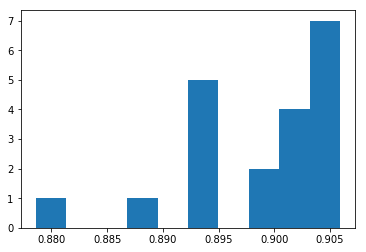

95.0 confidence interval 88.4% and 90.6%


In [0]:
# configure bootstrap
n_iterations = 20              # Number of bootstrap samples to create
n_size = int(len(df_orig) * 1)    # size of a bootstrap sample
df_z = df_orig.apply(zscore)
y = df_z[['price']]
X = df_z.drop(labels= "price" , axis = 1)
concrete_XY = X.join(y)
values = concrete_XY.values
# run bootstrap
stats = list()   # empty list that will hold the scores for each bootstrap iteration

for i in range(n_iterations):
    print("Iteration number : {}".format(i))
    # prepare train and test sets
    train = resample(values, n_samples=n_size)  # Sampling with replacement
	
    test = np.array([x for x in values if x.tolist() not in train.tolist()])  # picking rest of the data not considered in sample

    # fitting model with best parameters obtained using GridSearchCV
	
    gbr = GradientBoostingRegressor(learning_rate= 0.05, max_depth= 6, max_features= 0.3, min_samples_leaf= 5, n_estimators= 1000)  
	
    gbr.fit(train[:,:-1], train[:,-1])   # fit against independent variables and corresponding target values

	
    gbr.fit(train[:,:-1], train[:,-1])   # fit against independent variables and corresponding target values
	
    y_test = test[:,-1]    # Take the target column for all rows in test set

    # evaluate model
	
    predictions = gbr.predict(test[:, :-1])   # predict based on independent variables in the test data
	
    score = gbr.score(test[:, :-1] , y_test)

	
    stats.append(score)

# For plotting the 95% confidence interval
plt.hist(stats)
plt.show()
# confidence intervals
alpha = 0.95                             # for 95% confidence 
p = ((1.0-alpha)/2.0) * 100              # tail regions on right and left .25 on each side indicated by P value (border)
lower = max(0.0, np.percentile(stats, p))  
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(stats, p))
print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))

One can see that 95% cofidence interval for the final model is between 88.5% to 90%.